In [19]:
!pip install langgraph
from typing import Dict,TypedDict
from langgraph.graph import StateGraph, START, END


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\mdmaz\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [20]:
class AgentState(TypedDict):
    number1: int
    number2: int
    operation1: str
    number3: int
    number4: int
    operation2: str
    finalNumber1: int
    finalNumber2: int

In [21]:
def adder(state:AgentState) -> AgentState:
    """This node addes 2 number"""
    state['finalNumber1'] = state['number1'] + state['number2']
    return state

def subtractor(state:AgentState) -> AgentState:
    """This node substracts 2 number"""
    state['finalNumber1'] = state['number1'] - state['number2']
    return state

def decide_next_node(state:AgentState) -> AgentState:
    """This node will select the next node"""
    if state['operation1'] == "+":
        return "addition_operation"
    if state['operation1'] == "-":
        return "subtraction_operation"

# for next part

def adder2(state:AgentState) -> AgentState:
    """This node addes 2 number"""
    state['finalNumber2'] = state['number3'] + state['number4']
    return state

def subtractor2(state:AgentState) -> AgentState:
    """This node substracts 2 number"""
    state['finalNumber2'] = state['number3'] - state['number4']
    return state

def decide_next_node2(state:AgentState) -> AgentState:
    """This node will select the next node"""
    if state['operation2'] == "+":
        return "addition_operation2"
    if state['operation2'] == "-":
        return "subtraction_operation2"




In [22]:
graph = StateGraph(AgentState)

graph.add_node("add_node1",adder)
graph.add_node("subtract_node1",subtractor)
graph.add_node("router1", lambda state:state) #passthrough

graph.add_node("add_node2",adder2)
graph.add_node("subtract_node2",subtractor2)
graph.add_node("router2", lambda state:state) #passthrough

graph.add_edge(START, "router1")
graph.add_conditional_edges(
    "router1",
    decide_next_node,
    {
        # Edge : Node
        "addition_operation": "add_node1",
        "subtraction_operation": "subtract_node1"
    }
)
graph.add_edge("add_node1", "router2")
graph.add_edge("subtract_node1", "router2")
graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        # Edge : Node
        "addition_operation2": "add_node2",
        "subtraction_operation2": "subtract_node2"
    }
)

graph.add_edge("add_node2",END)
graph.add_edge("subtract_node2",END)
app = graph.compile()

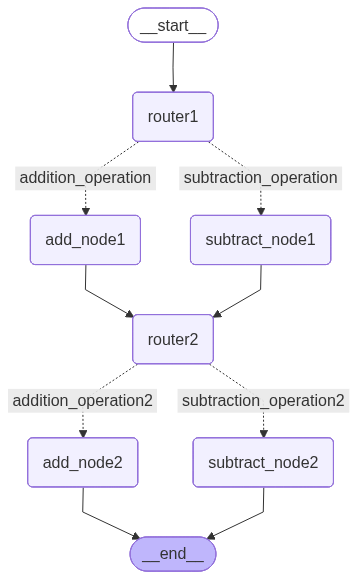

In [23]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [31]:
ans = app.invoke({"number1": 10, "number2": 5, "operation1": "+","number3": 20, "number4": 10, "operation2": "-"})
print(f"Final numner1 is:::: {ans['finalNumber1']}                   and            the second number is:::: {ans['finalNumber2']}")

Final numner1 is:::: 15                   and            the second number is:::: 10
